## Q2 Coverage Pay EDA

EDA of a dataset from a small charter school network that rolled out coverage pay for the 2023-2024 school year due to staff shortages and to fiscally incentivize staff to cover classes and other duties at their academic campuses in Quarter 2 (Q2) October 20, 2023 to January 19, 2024.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv(r"C:\Users\togarro\Downloads\Coverage Tracker (Responses) - Coverage Compensation - Q2.csv", parse_dates = ['Date','Date of Coverage'])

In [3]:
df = df.drop(columns = ['Unnamed: 3', 'Unnamed: 4','Unnamed: 5', 
                        'Reference', 'Approved/Unapproved', 'Coverage Approval',
                        'Supervisor', 'Email Address'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1194 non-null   datetime64[ns]
 1   Name                 1194 non-null   object        
 2   Employee No          1194 non-null   int64         
 3   Date of Coverage     1194 non-null   datetime64[ns]
 4   Type of Coverage     1194 non-null   object        
 5   Campus               1194 non-null   object        
 6   Number of Coverages  1194 non-null   int64         
 7   Total Compensation   1194 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 74.8+ KB


In [5]:
dups = df[df.duplicated()]
dups

,Date,Name,Employee No,Date of Coverage,Type of Coverage,Campus,Number of Coverages,Total Compensation


There are no duplicates in the dataset.

In [6]:
df.shape

(1194, 8)

In [7]:
round(df['Total Compensation'].sum(),2)

72039.37

In total 72,039.37 USD of coverage pay was submitted by staff in Q2.

In [8]:
df['Number of Coverages'].sum()

1654

There were a total number of 1654 coverages submitted in Q2

In [9]:
df['Type of Coverage'].nunique()

5

In Q2 there were 5 types of coverages 'Long Term', 'Short Term', 'After School Program Tutoring',
       'Non Instructional', and 'After School Program Clubs'.

In [10]:
#Data Cleaning
df['Name'] = df['Name'].str.title()
df['Name'].nunique()

76

76 staff members submitted coverage pay in Q2

In [11]:
df['Campus'].nunique()

3

There are 3 campuses in the dataset

### Coverage Metrics

In [12]:
#Coverage Metrics
round(df.groupby('Name')['Number of Coverages'].sum().describe())

count     76.0
mean      22.0
std       26.0
min        1.0
25%        5.0
50%       13.0
75%       29.0
max      138.0
Name: Number of Coverages, dtype: float64

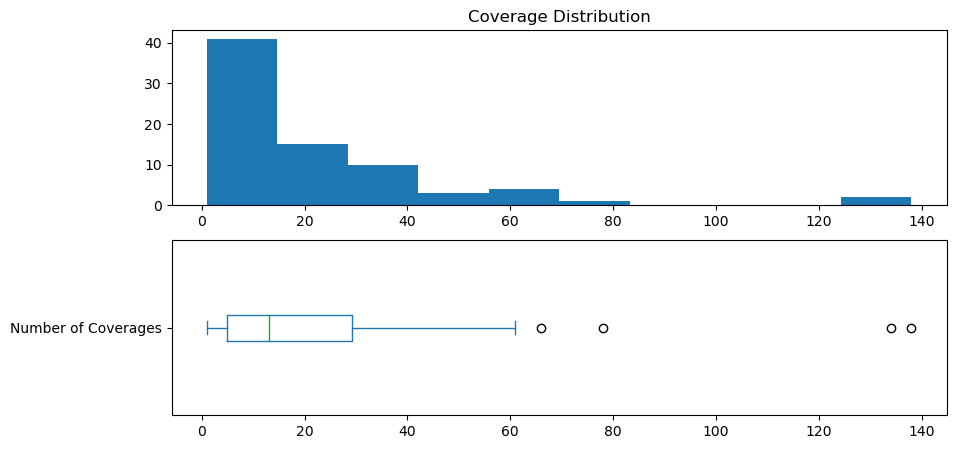

In [13]:
#Creating dataset
coverage_distribution = df.groupby('Name')['Number of Coverages'].sum()

#Creating Subplot
fig, ax = plt.subplots(nrows = 2, ncols =1, figsize = (10,5))

#Plotting data
ax[0].hist(coverage_distribution)
coverage_distribution.plot(kind = 'box', ax = ax[1], vert = False)

#Labels
ax[0].set_title('Coverage Distribution')

plt.show()


In [14]:
#Coverage Submission Outlier Calculation
Coverage_25 = 5
Coverage_75 = 29
IQR = Coverage_75 - Coverage_25 

round(Coverage_75 + (IQR * 1.5))

65

An employee with more than 65 coverages is considered an outlier.

In [15]:
#Counting Outliers
emp_total_coverages = coverage_distribution.reset_index()
emp_total_coverages[emp_total_coverages['Number of Coverages']>= 65].sort_values(by = 'Number of Coverages', ascending = False).shape[0]

4

There is a right skew in the data as there are several outliers increasing the average number of coverages in the dataset.Any staff member that submitted 65 or more coverages is an outlier.Additionally, there are four employees who are outliers in regards to the total number of coverages submitted by them in Q2.

In [16]:
coverage_type = df.groupby('Type of Coverage')['Number of Coverages'].sum().sort_values(ascending = False)
coverage_type

Type of Coverage
Non Instructional                480
Short Term                       401
Long Term                        343
After School Program Tutoring    249
After School Program Clubs       181
Name: Number of Coverages, dtype: int64

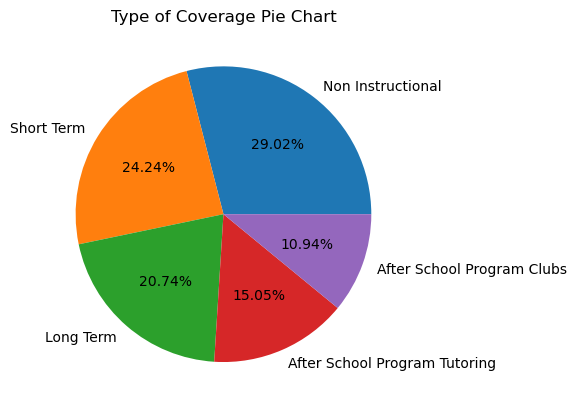

In [17]:
#Plotting Data
coverage_labels = ['Non Instructional', 'Short Term', 'Long Term','After School Program Tutoring', 'After School Program Clubs']
plt.pie(coverage_type, labels = coverage_labels, autopct = '%.2f%%' )

#Labels
plt.title('Type of Coverage Pie Chart')

#Display
plt.show()

Non Instructional coverages was the most frequent type of coverage submitted in Q2, 481(~28%)

### Compensation Metrics

In [18]:
#Compensation Metrics
round(df.groupby('Name')['Total Compensation'].sum().describe(),2)

count      76.00
mean      947.89
std      1108.68
min        25.00
25%       149.90
50%       477.30
75%      1518.75
max      5348.34
Name: Total Compensation, dtype: float64

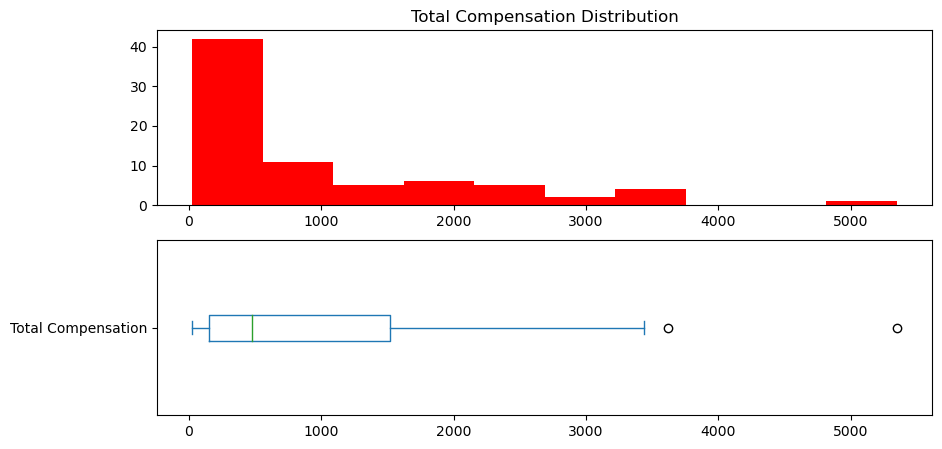

In [19]:
#Creating datset
compensation_distribution = df.groupby('Name')['Total Compensation'].sum()

#Creating subplot
fig, ax = plt.subplots(nrows = 2 , ncols = 1, figsize = (10,5))

#Plotting data
ax[0].hist(compensation_distribution, color = 'red')
compensation_distribution.plot(kind = 'box', vert = False, ax = ax[1])

#Labels 
ax[0].set_title('Total Compensation Distribution')

#Display
plt.show()

In [20]:
#Total Compensation Outlier Calculation
Compensation_25 = 149.90
Compensation_75 = 1518.75
IQR = Compensation_75 - Compensation_25

round(Compensation_75 + (IQR * 1.5),2)

3572.02

In [21]:
#Coutning Compensation Outliers
emp_total_comp = compensation_distribution.reset_index()
emp_total_comp[emp_total_comp['Total Compensation']>= 3572.03 ]

,Name,Total Compensation
22,Daneena Dixon,5348.34
71,Vianney Anzures,3620.00


In [22]:
total_compensation = df.groupby('Type of Coverage')['Total Compensation'].sum().sort_values(ascending = False)
total_compensation

Type of Coverage
After School Program Tutoring    19920.00
After School Program Clubs       14480.00
Long Term                        13579.37
Short Term                       12060.00
Non Instructional                12000.00
Name: Total Compensation, dtype: float64

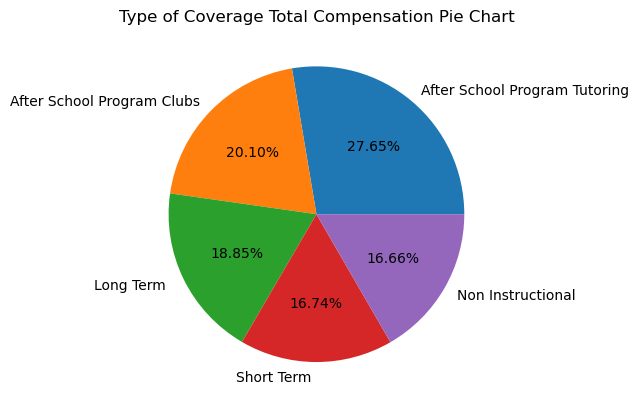

In [23]:
#Plotting data
compensation_labels = ['After School Program Tutoring', 'After School Program Clubs',
                       'Long Term ','Short Term ','Non Instructional ']
plt.pie(total_compensation, labels = compensation_labels, autopct = '%.2f%%')

#labels
plt.title('Type of Coverage Total Compensation Pie Chart')

#Display
plt.show()

After School Program Tutoring was the the type of coverage that cost the most in Q2 despite accounting for ~15% of coverage submissions in Q2.

### Campus Coverage and Compensation Metrics

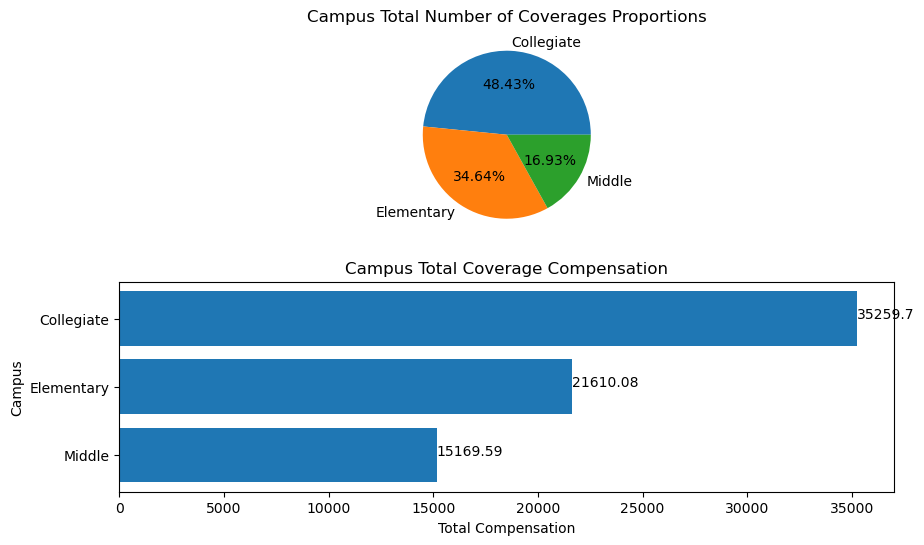

In [24]:
#Data
campus_coverage = df.groupby('Campus')['Number of Coverages'].sum().sort_values(ascending = False)
campus_compensation = round(df.groupby('Campus')['Total Compensation'].sum().sort_values(ascending = True).reset_index(),2)

labels = ['Collegiate', 'Elementary', 'Middle']

#Create Subplot
fig,ax = plt.subplots(nrows =2 , ncols = 1, figsize = (10,6))

#Plotting Data
ax[0].pie(campus_coverage, autopct = '%.2f%%', labels = labels)
ax[1].barh(campus_compensation['Campus'], campus_compensation['Total Compensation'])

#Labels
ax[0].set_title('Campus Total Number of Coverages Proportions')
ax[1].set_title('Campus Total Coverage Compensation')
ax[1].set_xlabel('Total Compensation')
ax[1].set_ylabel('Campus')

for index, value in enumerate (campus_compensation['Total Compensation']):
    ax[1].text(value,index,str(value))

Staff at the Collegiate Campus submitted 801 coverages (~48.43%) in Q2.The Collegiate Campus also had the highest coverage compensation in Q2 as well, $32,259.70 USD